In [1]:
import time
import statistics
import numpy as np
import timeit
import unittest
from scipy.optimize import curve_fit
import sys 
import matplotlib.pyplot as plt
sys.setrecursionlimit(5000)
#increases recursion limit

<h3>FACTORIAL FUNCTIONS<h3>     

<h4>Iterative Factorial Function<h4>

In [2]:
def iterative_fact(number):
    fact = 1
    while number >= 1:
        fact = fact * number
        
        number -=1
    return fact

<h4>Tail Recursive Factorial Function<h4>                                 

In [3]:
def factTR(n, a): 
    if (n == 0): 
        return a 
    return factTR(n - 1, n * a) 
def factTail_Recur(n): 
    return factTR(n, 1) 

<h4>Non-Tail Recursive Factorial Function<h4>

In [4]:
def factNonTail_Recur(n): 
    if (n == 0): 
        return 1
    return n * factNonTail_Recur(n-1) 

<h4>Plotting running time as a function of N<h4>

In [5]:
nonTail_time=[]
nonTail_results=[]
Tail_time=[]
Tail_results=[]
iterative_time=[]
iterative_results=[]
origin_input_array=list(range(10, 499, 100))

for value in origin_input_array: 
    for _ in range(50):
        temp =[]
        start=time.perf_counter()
        iterative_fact(value)
        temp.append((time.perf_counter()-start)*10e9)
    iterative_time.append(statistics.mean(temp))
    iterative_results.append(iterative_fact(value)) 
    
    for _ in range(50):
        temp=[]
        start=time.perf_counter()
        factNonTail_Recur(value)
        temp.append((time.perf_counter()-start)*10e9)
    nonTail_time.append(statistics.mean(temp))
    nonTail_results.append(factNonTail_Recur(value))  
    
    for _i in range(50):
        temp=[]
        start=time.perf_counter()
        factTail_Recur(value)
        temp.append((time.perf_counter()-start)*10e9)
    Tail_time.append(statistics.mean(temp))
    Tail_results.append(factTail_Recur(value))

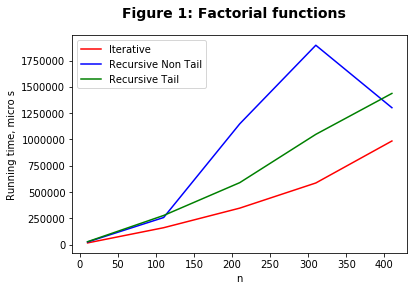

In [6]:
plt.figure()
plt.plot(origin_input_array,iterative_time,'r',label="Iterative")
plt.plot(origin_input_array,nonTail_time,'b',label="Recursive Non Tail")
plt.plot(origin_input_array,Tail_time,'g',label="Recursive Tail")
plt.legend()
plt.xlabel('n')
plt.ylabel('Running time, micro s')
plt.suptitle('Figure 1: Factorial functions', fontsize=14, fontweight='bold')
plt.savefig('Fig1FactorialFunctions.png')

<h3>Curve fit graph for factorial function running times<h3>

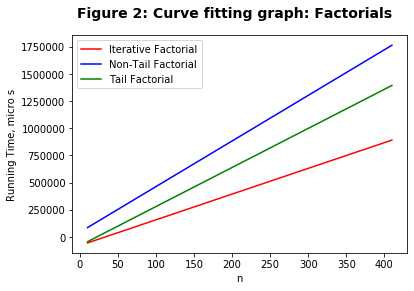

In [7]:
def linear(x,a,b):
    return a*x+b

xdata=np.array(origin_input_array)
ydata_1=np.array(iterative_time)
ydata_2=np.array(nonTail_time)
ydata_3=np.array(Tail_time)

param1, param_cov1 = curve_fit(linear,xdata, ydata_1)
param2, param_cov2 = curve_fit(linear,xdata, ydata_2)
param3, param_cov3 = curve_fit(linear,xdata, ydata_3)

plt.plot(xdata,linear(xdata, *param1),'r',label="Iterative Factorial")
plt.plot(xdata,linear(xdata, *param2),'b',label="Non-Tail Factorial")
plt.plot(xdata,linear(xdata, *param3),'g',label="Tail Factorial")
plt.legend()
plt.xlabel('n')
plt.ylabel('Running Time, micro s')
plt.suptitle('Figure 2: Curve fitting graph: Factorials', fontsize=14, fontweight='bold')
plt.savefig('Fig2CurveFittingGraph_Factorials')

<hr>

<h3>BINARY SEARCH METHODS: ITERATIVE AND RECURSIVE</h3>

In [8]:
def binary_search_iterative(data, target):
    low = 0
    high = len(data)-1
    while low <= high:
        mid = (low + high) // 2
        if target == data[mid]:  
            return True
        elif target < data[mid]:
            high = mid - 1                
        else:
            low = mid + 1             
    return False  

In [9]:
def binary_search_recursive(data, target, low, high):
    if low > high:
        return False                   
    else:
        mid = (low + high) // 2
    if target == data[mid]:      
        return True
    elif target < data[mid]:
        return binary_search_recursive(data, target, low, mid - 1)
    else:
        return binary_search_recursive(data, target, mid + 1, high)

<h3>WORST CASE RUNNING TIMES</h3>

In [21]:
input_arrayW=[]
last_value =[]
len_listW=list(range(10, 501, 10))
for i in range(10, 501, 10):
    fac_result=[]
    for j in range(1,i):
        fac_result.append(iterative_fact(j))
    input_arrayW.append(fac_result)
    last_value.append(fac_result[-1])

<h4>Using iterative binary search </h4>

In [22]:
search_time_ItWorst=[]
for index in range(len(input_arrayW)):
    tempIt =[]
    start=time.perf_counter()
    binary_search_iterative(input_arrayW[index], last_value[index])
    tempIt.append((time.perf_counter()-start)*10e9)
    search_time_ItWorst.append(statistics.mean(tempIt))

<h4>Using recursive binary search </h4>

In [23]:
search_time_RecurWorst=[]
for index in range(len(input_arrayW)):
    tempRecur =[]
    start=time.perf_counter()
    binary_search_recursive(input_arrayW[index], last_value[index],0,len(input_arrayW[index])-1)
    tempRecur.append((time.perf_counter()-start)*10e9)  
    search_time_RecurWorst.append(statistics.mean(tempRecur))

<h4>Plotting running time as a function of N<h4>

Text(5.25, 0.5, 'Running Time, micro s')

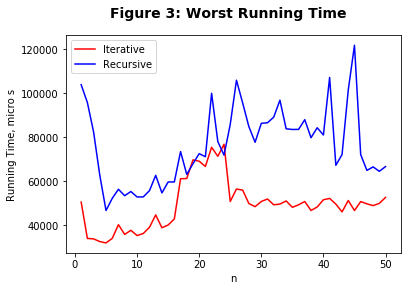

In [24]:
input_array_sizeWorst=[]
for i in range(1,len(input_arrayW) +1):
    input_array_sizeWorst.append(i)
plt.plot(input_array_sizeWorst,search_time_ItWorst,'r',label="Iterative")
plt.plot(input_array_sizeWorst,search_time_RecurWorst,'b',label="Recursive")
plt.legend()
plt.suptitle('Figure 3: Worst Running Time', fontsize=14, fontweight='bold')
plt.savefig('Fig3WorstRunningTime')
plt.xlabel('n')
plt.ylabel('Running Time, micro s')

<h4>Curve fit graph</h4>

[ 4.85723465e-03 -3.02253317e+00  5.98638398e+02  6.66074396e+04]


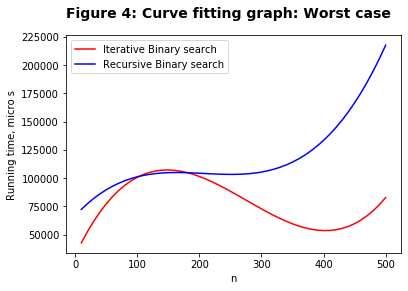

In [14]:
def poly(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x +d

xdata=np.array(len_listW)
ydata_1=np.array(search_time_ItWorst)
ydata_2=np.array(search_time_RecurWorst)

param1, param_cov1 = curve_fit(poly,xdata, ydata_1)
param2, param_cov2 = curve_fit(poly,xdata, ydata_2)

plt.plot(xdata,poly(xdata, *param1),'r',label="Iterative Binary search")
plt.plot(xdata,poly(xdata, *param2),'b',label="Recursive Binary search")

popt, pcov = curve_fit(poly,xdata,ydata_1)
popt, pcov = curve_fit(poly,xdata,ydata_2)
print(popt)

plt.xlabel('n')
plt.ylabel('Running time, micro s')
plt.legend()
plt.suptitle('Figure 4: Curve fitting graph: Worst case', fontsize=14, fontweight='bold')
plt.savefig('Fig4CurveFittingGraph_Worst case')


<hr>

<h3>BEST CASE RUNNING TIMES</h3>

In [15]:
input_array=[]
mid_value =[]
len_listB=list(range(4,100,1))
for i in range(4,100,1):
    fac_result=[]
    for j in range(1,i):
        fac_result.append(iterative_fact(j))
    input_array.append(fac_result)
    mid_value.append(fac_result[(len(fac_result)//2)])

<h4>Using iterative binary search</h4>

In [16]:
search_time_ItBest=[]
for index in range(len(input_array)):
    tempIt =[]
    start=time.perf_counter()
    binary_search_iterative(input_array[index], mid_value[index])
    tempIt.append((time.perf_counter()-start)*10e9)
    search_time_ItBest.append(statistics.mean(tempIt))

<h4>Using recursive binary search</h4>

In [17]:
search_time_RecurBest=[]
for index in range(len(input_array)):
    tempRecur=[]
    start=time.perf_counter()
    binary_search_recursive(input_array[index], mid_value[index],0,len(input_array[index])-1)
    tempRecur.append((time.perf_counter()-start)*10e9)
    search_time_RecurBest.append(statistics.mean(tempRecur))

<h4>Plotting running time as a function of N<h4>

Text(-1.0, 0.5, 'Running Time, micro s')

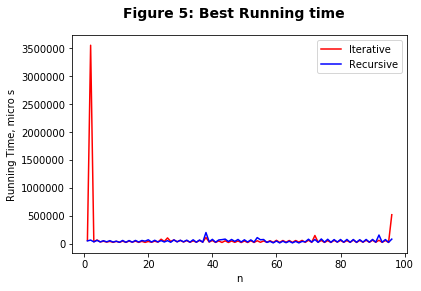

In [18]:
input_array_sizeBest=[]
for i in range(1,len(input_array[index])-1):
    input_array_sizeBest.append(i)
plt.plot(input_array_sizeBest,search_time_ItBest,'r',label="Iterative")
plt.plot(input_array_sizeBest,search_time_RecurBest,'b',label="Recursive")
plt.legend()
plt.suptitle('Figure 5: Best Running time', fontsize=14, fontweight='bold')
plt.savefig('Fig5BestRunningTime')
plt.xlabel('n')
plt.ylabel('Running Time, micro s')

<h4>Curve fit graph</h4>

[   80.63787826 44548.7117196 ]


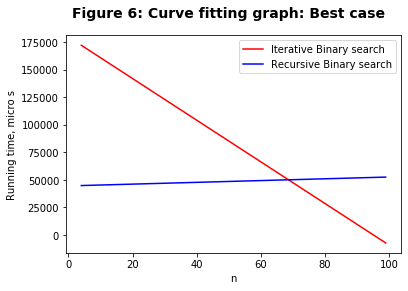

In [19]:
def linear(x,a,b):
    return a*x+b

xdata=np.array(len_listB)
ydata_1=np.array(search_time_ItBest)
ydata_2=np.array(search_time_RecurBest)

param1, param_cov1 = curve_fit(linear,xdata, ydata_1)
param2, param_cov2 = curve_fit(linear,xdata, ydata_2)

plt.plot(xdata,linear(xdata, *param1),'r',label="Iterative Binary search")
plt.plot(xdata,linear(xdata, *param2),'b',label="Recursive Binary search")

popt, pcov = curve_fit(linear,xdata,ydata_1)
popt, pcov = curve_fit(linear,xdata,ydata_2)
print(popt)

plt.xlabel('n')
plt.ylabel('Running time, micro s')
plt.legend()
plt.suptitle('Figure 6: Curve fitting graph: Best case', fontsize=14, fontweight='bold')
plt.savefig('Fig6CurveFittingGraph_Best case')


<hr>

In [20]:
import unittest

class TestFactorial(unittest.TestCase):
    def test_factorialNonTail(self):
        f = factNonTail_Recur(5)
        self.assertEqual(f, 120)
    def test_factorialRecur(self):  
        f = factTail_Recur(5)
        self.assertEqual(f, 120)
    def test_factorialIterative(self):
        f = iterative_fact(5)
        self.assertEqual(f, 120)

    def test_binary_searchIT(self):
        self.assertTrue(binary_search_iterative([1, 3], True), 1)
        
    def test_binary_searchRecur(self):
        self.assertTrue(binary_search_iterative([1, 2,1,3], True), 1)

    
    
if __name__ == "__main__" :
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.143s

OK


The objective of this assignment is to determine the amount of resources (time and storage) necessary to execute factorial algorithms and binary search algorithms of different types (iterative and recursive). In this assignment we are trying to identify speed, efficiency, clarity, correctness and maintainability of each of the function types. 
<br><br>
All three factorial functions- iterative, non-tail recursive and tail recursive - have the same big-O complexity, however all have different running times.<br>
As displayed in graph <i>Figure 1: Factorial functions</i> the iterative factorial function has the shortest running time over the tail and non-tail recursive functions. <br>
With regards to the run-time stack, an iterative function is better than a recursive function to find the factorial of a number. Every time a function is called, data is appended to the stack. This is only cleared when the function terminates. Therefore, recursion will append much more to the runtime stack than iteration. Tail recursion is usually more efficient than non-tail recursion. The recursive calls do not need to be added to the call stack: there is only one, the current call, in the stack.(Jassim, 2020)
<br><br>
Using the curve fitting (regression) approach to predict the equation of the running time means I was predicting the mean of the dependent variable given specific values to the dependent variable. I measured both of these variables at the same point in time <i>Figure 2: Curve fitting graph: Factorials</i>.Curve fitting is the way we model or represent a data spread by assigning a 'best fit' function (curve) along the entire range. Ideally, it will capture the trend in the data and allow us to make predictions of how the data series will behave in the future. It also works as a data visualization aid for the user.
Curve fitting graph can be represented linear, or polynomial. In the case for the iterative, non-tail and tail recursive graphs, linear is the line of best fit
<br><br>
Binary search is an efficient algorithm for finding an item from a sorted list of items. It works by repeatedly dividing in half the portion of the list that could contain the item, until you've narrowed down the possible locations to just one. The idea of binary search is to use the information that the array is sorted and reduce the time complexity to O(Log n). The main difference between the iterative and recursive version of Binary Search is that the recursive version has a complexity of O(log N) while the iterative version has a complexity of O(1). Hence, even though recursive version may be easy to implement, the iterative version is efficient. For a binary search, the best-case is when the target is found in the middle of the search list. The worst-case is when the target is found at the end or in the beginning of the search list.(Lawrence,2020)
<br>
<br>
The maximum running time of an algorithm is illustrated in <i>Figure 3: Worst Running Time</i>, as the worst case running time of the algorithm. The recursive function has greater running time than the iterative function. In the worst case analysis, the upper bound on the running time of an algorithm is what we find.
In the case of the worst running time of a binary search algorithm, the worst running time is to find the upper bound on the running time of the algorithm is what we find. In this case I computed the time it took to find the last value, n of the array within the specified range. 
  <br><br>
In the case for the worst case running time of the linear binary search I found polynomial to be the line of best fit for the curve fit graph <i>Figure 4: Curve fitting graph: Worst case</i>. In the case for the best case running time of the linear binary search I found the linear function to be the line of best fit for the curve fit graph <i>Figure 6: Curve fitting graph: Best case</i>.
 <br><br>
    
In the best case analysis, we calculate lower bound on running time of an algorithm. We must know the case that causes minimum number of operations to be executed. In the linear search problem, the best case occurs when x is present at the first location. The number of operations in the best case is constant (not dependent on n). So time complexity in the best case would be Θ(1). The iterative and recursive functions both have the best case of time = 0. The minimum running time is found in the base case scenario as illustrated in <i>Figure 5: Best Running time</i>. 
In this case the best running time of a binary search algorithm is finding the middle value. 
     <br><br>
I took into consideration the requirements for optimal programming such as speed using a range that will run the code quickly but still broad enough to show meaningful results. I accounted for the complexity of each function in order to ensure optimum efficiency. All of the code is written with meaningful variable, method and class names in order to ensure clarity. When plotting the running time as a function of n, multiplying the output by 10e9 means that the time (measured in microseconds) is inflated in order to be visible in the x axis. The program is written to a scalable manner and performs how it should by doing this it achieves correctness. I included unittests in my code in order to ensure maintainability for my program.  
  <br><br>
I conclude that the most efficient use of resources (time and storage) necessary to execute factorial algorithms and binary search algorithms was the iterative function.


<b>References:<br></b>
- Jassim, W. (2020) 'Lecture 4','Lecture 5','Lecture 6' [Lecture], COMP20230:  Data Structures & Algorithms. University College Dublin. February.<br>
- H, Lawrence. Visual Calculus: Curve Fitting. Retrieved from http://archives.math.utk.edu/visual.calculus/0/curve_fit.5/index.html on February 2020